In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(42000, 785)

In [4]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [5]:
df.value_counts("label") # unique value count

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
dtype: int64

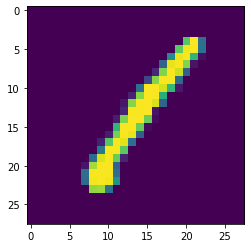

In [6]:
plt.imshow(df.iloc[0,1:].values.reshape(28,28))

In [7]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [9]:
print(X_train.shape)
print()
print(X_test.shape)

(33600, 784)

(8400, 784)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()


In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
# since knn is checking each value with 36000 datas in 784 dimensions it may take a while
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

13.324183940887451


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

# Using PCA to gain accuracy almost like knn but, with lower number of coulumns

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
# Mean centering done
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 200) # if none given then all columns will be taken

In [47]:
# Found the eigen vectors and eigen values and shifted those data to the new co-ordinate axis
X_train_trf = pca.fit_transform(X_train)
X_test_trf= pca.fit_transform(X_test)

In [48]:
X_train_trf.shape

(33600, 200)

In [49]:
# Agin training the transformed model
knn = KNeighborsClassifier()
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [50]:
y_pred = knn.predict(X_test_trf)

In [51]:
accuracy_score(y_test, y_pred)

0.6698809523809524

In [52]:
# Looping the enire process to check accuracy in each given Principal Component
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf= pca.fit_transform(X_test)
    
    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test, y_pred))

0.25285714285714284
0.32511904761904764
0.5040476190476191
0.6551190476190476
0.7229761904761904
0.8182142857142857
0.8347619047619048
0.8646428571428572
0.8761904761904762
0.8980952380952381
0.7729761904761905
0.7780952380952381
0.7839285714285714
0.8029761904761905
0.6755952380952381
0.7097619047619048
0.7794047619047619
0.8098809523809524
0.7283333333333334
0.8133333333333334
0.7696428571428572
0.7448809523809524
0.7053571428571429
0.7375
0.7294047619047619
0.6969047619047619
0.7202380952380952
0.7377380952380952
0.7130952380952381
0.6988095238095238
0.7045238095238096
0.7102380952380952
0.7023809523809523
0.7089285714285715
0.7182142857142857
0.7008333333333333
0.7017857142857142
0.7082142857142857
0.6921428571428572
0.6851190476190476
0.6910714285714286
0.69
0.7029761904761904
0.6978571428571428
0.700952380952381
0.7057142857142857
0.6921428571428572
0.6773809523809524
0.685952380952381
0.6967857142857142
0.6921428571428572
0.6911904761904762
0.6796428571428571
0.6902380952380952


KeyboardInterrupt: 

In [65]:
# Visualization on 2d
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)


In [66]:
X_train_trf # transformed into 2 columns i.e. the image is now 

array([[-2.71865825, -0.4895972 ],
       [-0.67701288, -6.75331265],
       [-3.03323046,  6.50929771],
       ...,
       [ 2.14879635,  0.78006109],
       [ 1.05958524,  0.94790515],
       [17.70264109,  1.9619554 ]])

In [67]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                color = y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [73]:
# Visualization on 3d
pca = PCA(n_components = 3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.fit_transform(X_test)


In [74]:
X_train_trf # transformed into 2 columns i.e. the image is now 

array([[-2.71856183, -0.48967754,  1.13563705],
       [-0.67687352, -6.75328528, -2.3353608 ],
       [-3.03326675,  6.5093995 ,  7.49135007],
       ...,
       [ 2.1488304 ,  0.78078617, -0.74730319],
       [ 1.05957682,  0.94780921,  3.94978486],
       [17.70254318,  1.96191182, -4.94352605]])

In [75]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 z=X_train_trf[:,2],
                color = y_train_trf)
fig.update_layout(
    margin = dict(l=20, r =20, t=20, b=20)

)
fig.show()

In [76]:
pca.explained_variance_ # Eigne values

array([40.87278367, 28.96628015, 27.04280028])

In [77]:
pca.components_ # Eigen vectors 

array([[-8.64979427e-18, -3.00492873e-20, -2.85352005e-20, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.98819919e-16,  3.24469334e-18, -4.03381909e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 5.08043682e-17,  7.06983879e-18, -5.03795031e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

AttributeError: 'PCA' object has no attribute 'explained__'